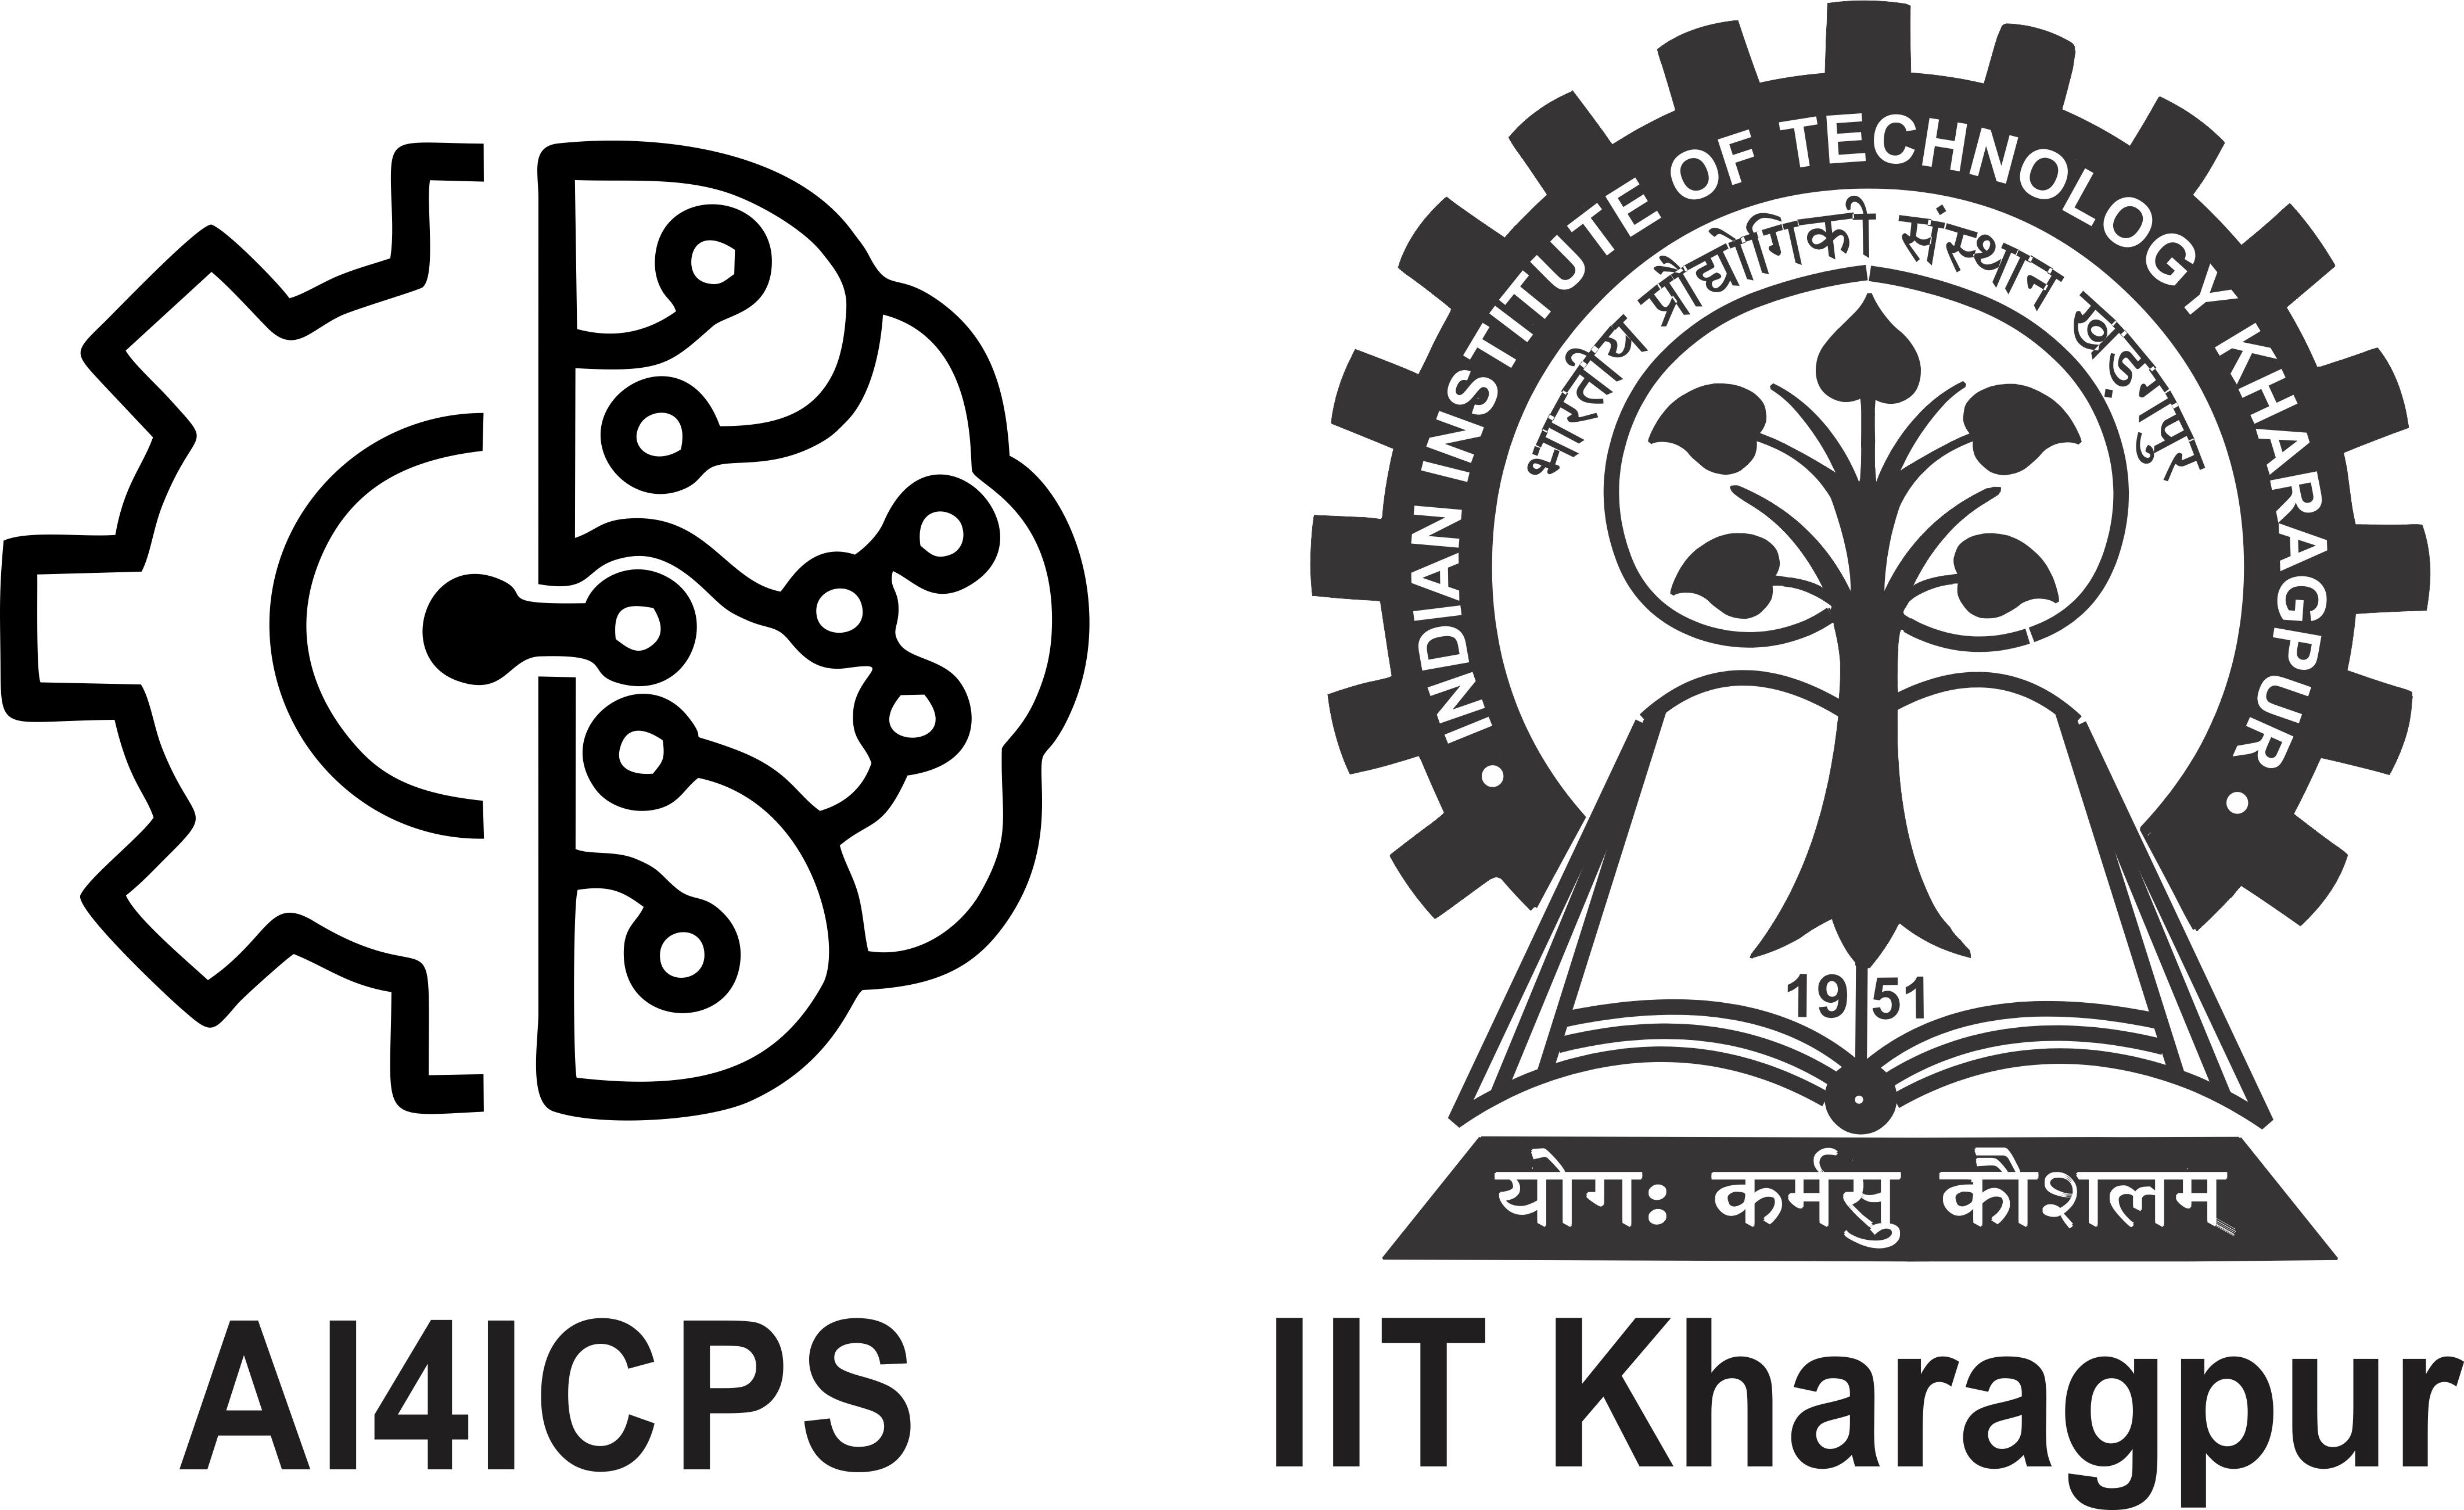

## DL Applications in Computer Vision Hands-On
by Nilanjan Sinhababu

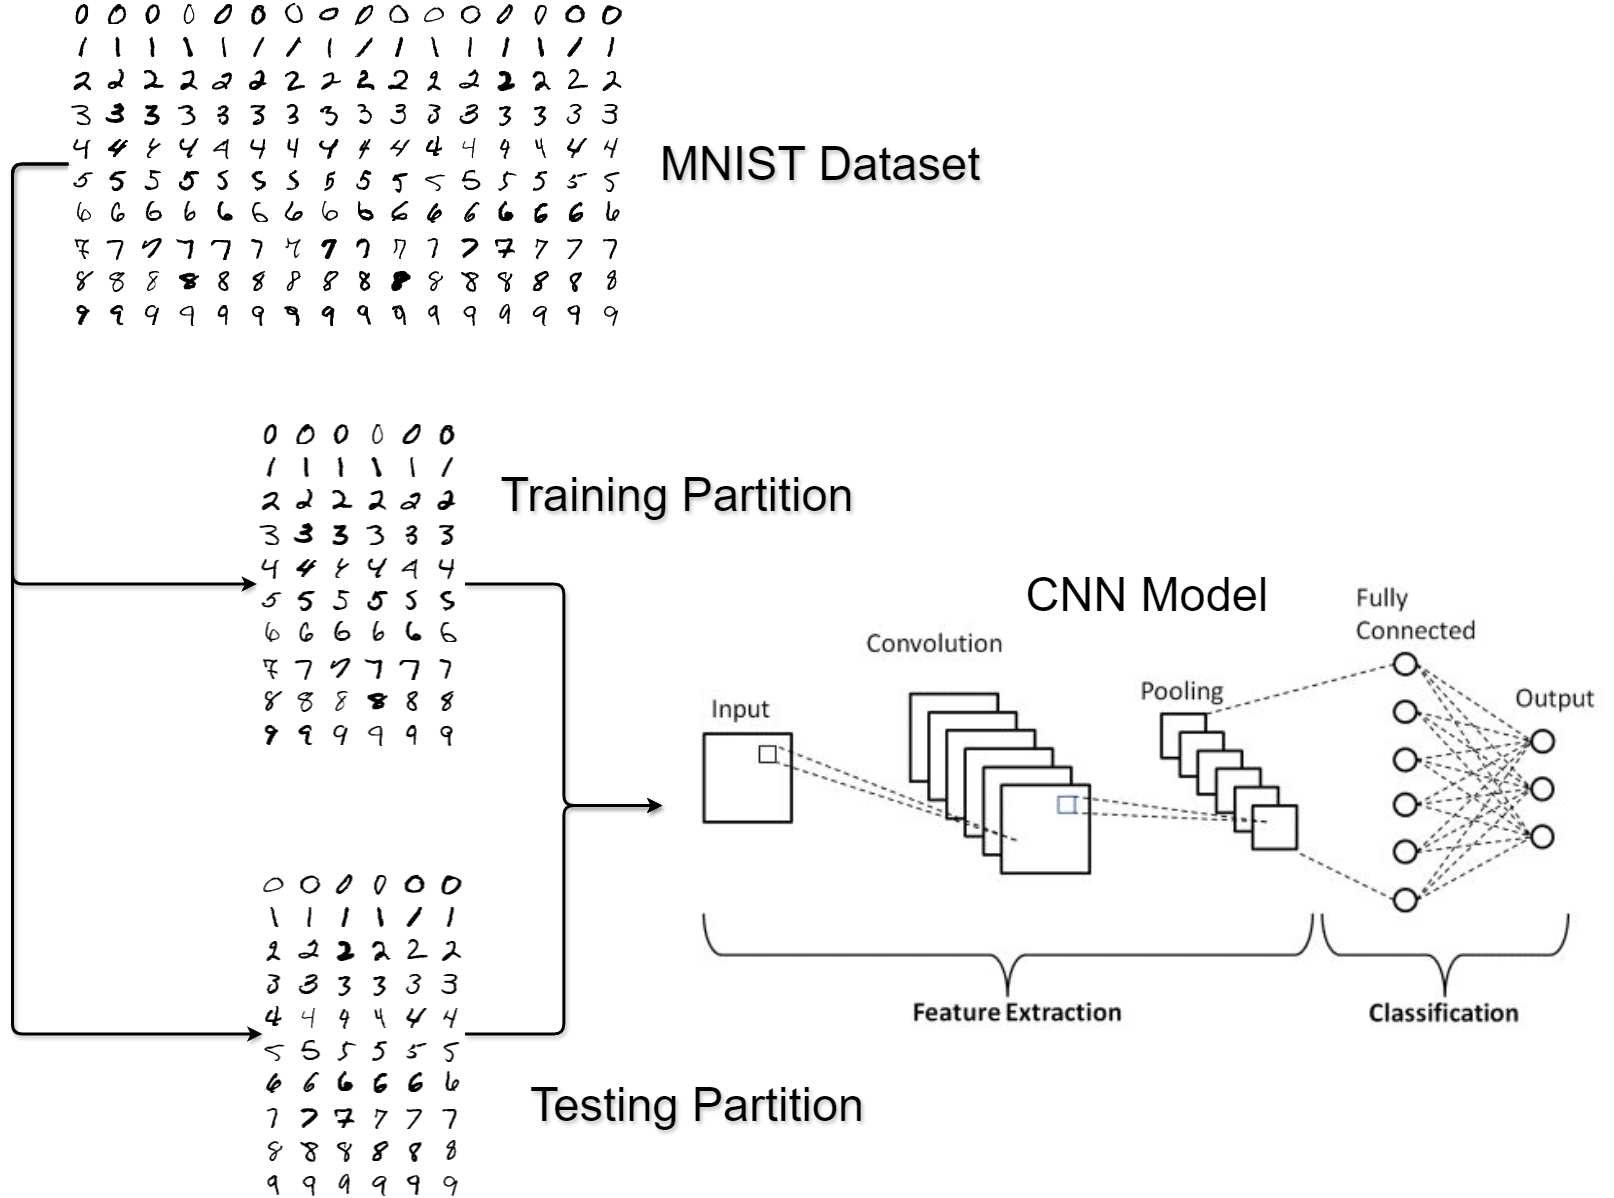

## What is a Digital Image?

In [3]:
'''
IMPORT IMAGE
'''
from skimage import io

my_image = io.imread("data/my_image.jpg")
print(f'Datatype = {my_image.dtype}')
print(f'Value range = {2**8}')
print(f'Dimension = {my_image.shape}')
print(' The image numpy array ')
print(my_image)


Datatype = uint8
Value range = 256
Dimension = (622, 1001, 3)
 The image numpy array 
[[[154 217 234]
  [154 217 234]
  [154 217 234]
  ...
  [163  73 163]
  [163  73 163]
  [163  73 163]]

 [[154 217 234]
  [154 217 234]
  [154 217 234]
  ...
  [163  73 163]
  [163  73 163]
  [163  73 163]]

 [[154 217 234]
  [154 217 234]
  [154 217 234]
  ...
  [163  73 163]
  [163  73 163]
  [163  73 163]]

 ...

 [[154 217 234]
  [154 217 234]
  [154 217 234]
  ...
  [ 35 177  77]
  [ 35 177  77]
  [ 35 177  77]]

 [[154 217 234]
  [154 217 234]
  [154 217 234]
  ...
  [ 35 177  77]
  [ 35 177  77]
  [ 35 177  77]]

 [[154 217 234]
  [154 217 234]
  [154 217 234]
  ...
  [ 35 177  77]
  [ 35 177  77]
  [ 35 177  77]]]


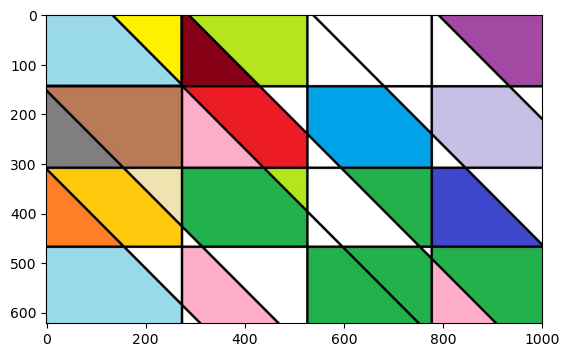

In [4]:
'''
DISPLAY IMAGE
'''

from matplotlib import pyplot as plt

plt.imshow(my_image)

In [5]:
'''
IMAGE FEATURES
'''

print(my_image.min(), my_image.max())

0 255


In [6]:
'''
CONVERT IMAGE DATA TYPE
'''
from skimage import img_as_float

my_float_img = img_as_float(my_image)
print(my_float_img.min(), my_float_img.max())

0.0 1.0


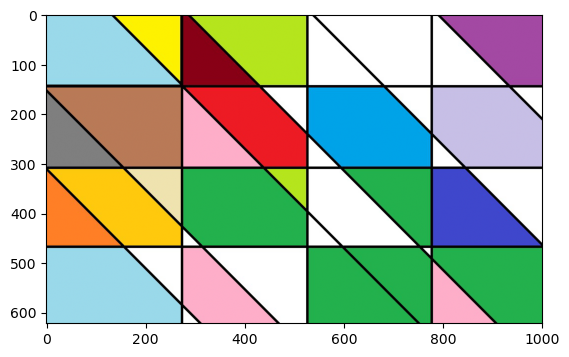

In [7]:
plt.imshow(my_float_img)

In [8]:
'''
MATHEMATICAL OPERATIONS ON IMAGE
'''

my_dark_image = my_float_img.copy()
my_dark_image = my_dark_image * 0.5
print(my_dark_image.min(), my_dark_image.max())

0.0 0.5


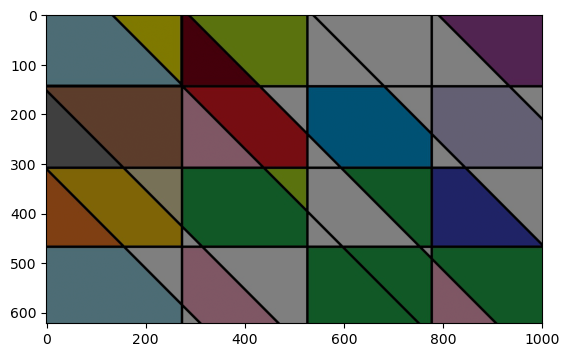

In [9]:
plt.imshow(my_dark_image)

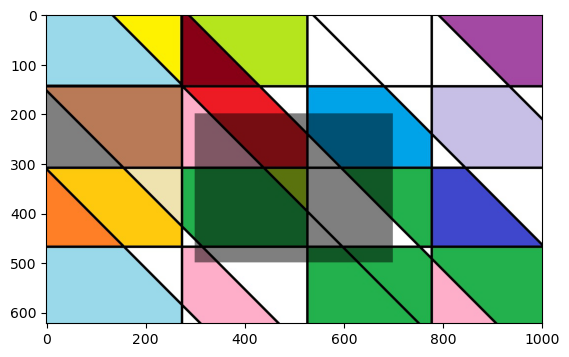

In [10]:
'''
UNDERSTANDING THE IDEA OF FILTER / KERNEL AND IMPLEMENT A SIMPLE FILTER
'''

my_filter_image= my_image.copy()
my_filter_image[200:500,300:700,:] = my_filter_image[200:500,300:700,:] * 0.5
plt.imshow(my_filter_image)

## AlexNet

AlexNet is the name of a convolutional neural network (CNN) architecture, designed by Alex Krizhevsky in collaboration with Ilya Sutskever and Geoffrey Hinton, who was Krizhevsky's Ph.D. advisor at the University of Toronto.

The three formed team SuperVision and submitted AlexNet in the ImageNet Large Scale Visual Recognition Challenge on September 30, 2012. The network achieved a top-5 error of 15.3%, more than 10.8 percentage points lower than that of the runner up. The original paper's primary result was that the depth of the model was essential for its high performance, which was computationally expensive, but made feasible due to the utilization of graphics processing units (GPUs) during training.


Source: Wikipedia

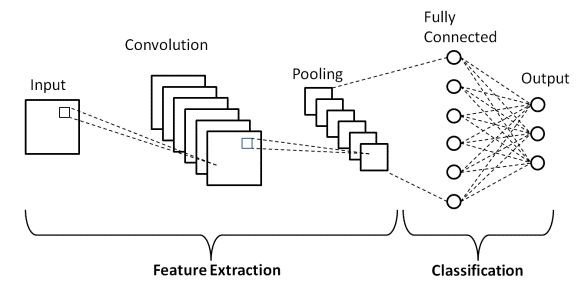

In [11]:
'''
IMPORT REQUIRED TORCH LIBRARIES
'''

import sys
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary

In [12]:
'''
SEEDING FOR GETTING SAME OUTPUT
'''

torch.manual_seed(42)

In [14]:
'''
LOAD MNIST DATASET
'''

data_path = 'data'

trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
full_train_set = dset.MNIST(root=data_path, train=True, transform=trans, download=True)
full_test_set = dset.MNIST(root=data_path, train=False, transform=trans)
batch_size = 16

torch.Size([28, 28])
torch.Size([28, 28])


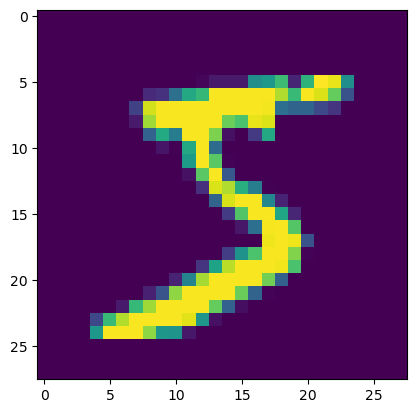

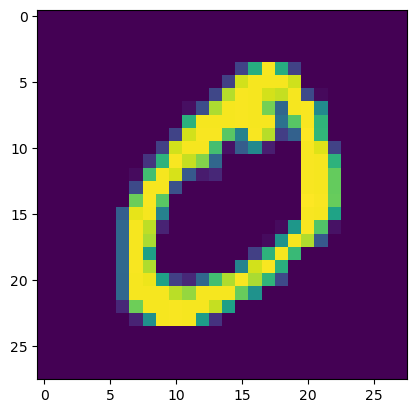

In [15]:
'''
DISPLAY THE DATA
'''

show = 2
max_show = show
for i in full_train_set:
  current_image = i[0][0]
  plt.figure(max_show+1-show)
  plt.imshow(current_image)
  print(current_image.shape)
  show-=1
  if show==0:
    break

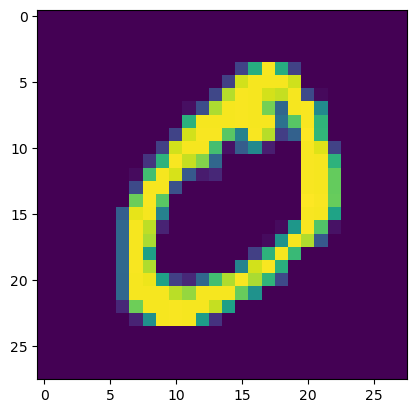

In [16]:
plt.imshow(current_image)

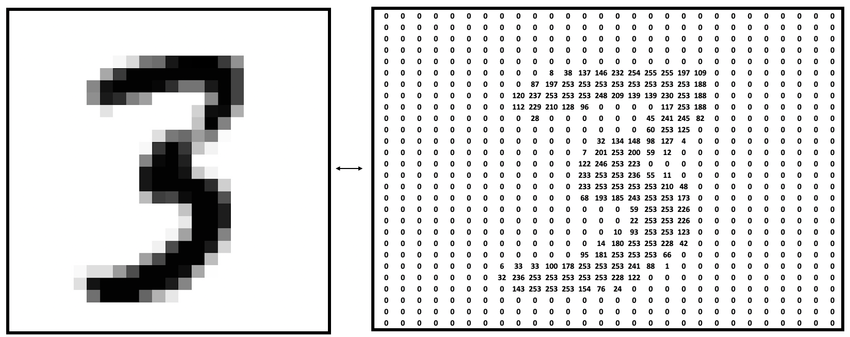

In [18]:
'''
USING TORCH DATA-LOADER
'''

train_loader = torch.utils.data.DataLoader(dataset=full_train_set,batch_size=batch_size,shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=full_test_set,batch_size=batch_size,shuffle=False)

## The AlexNet Architecture

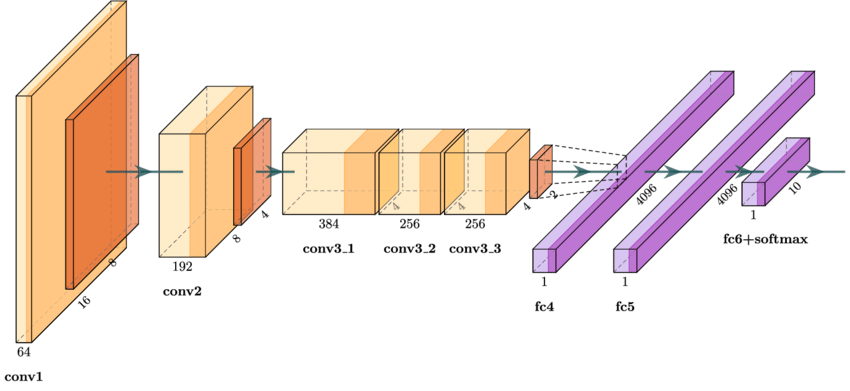

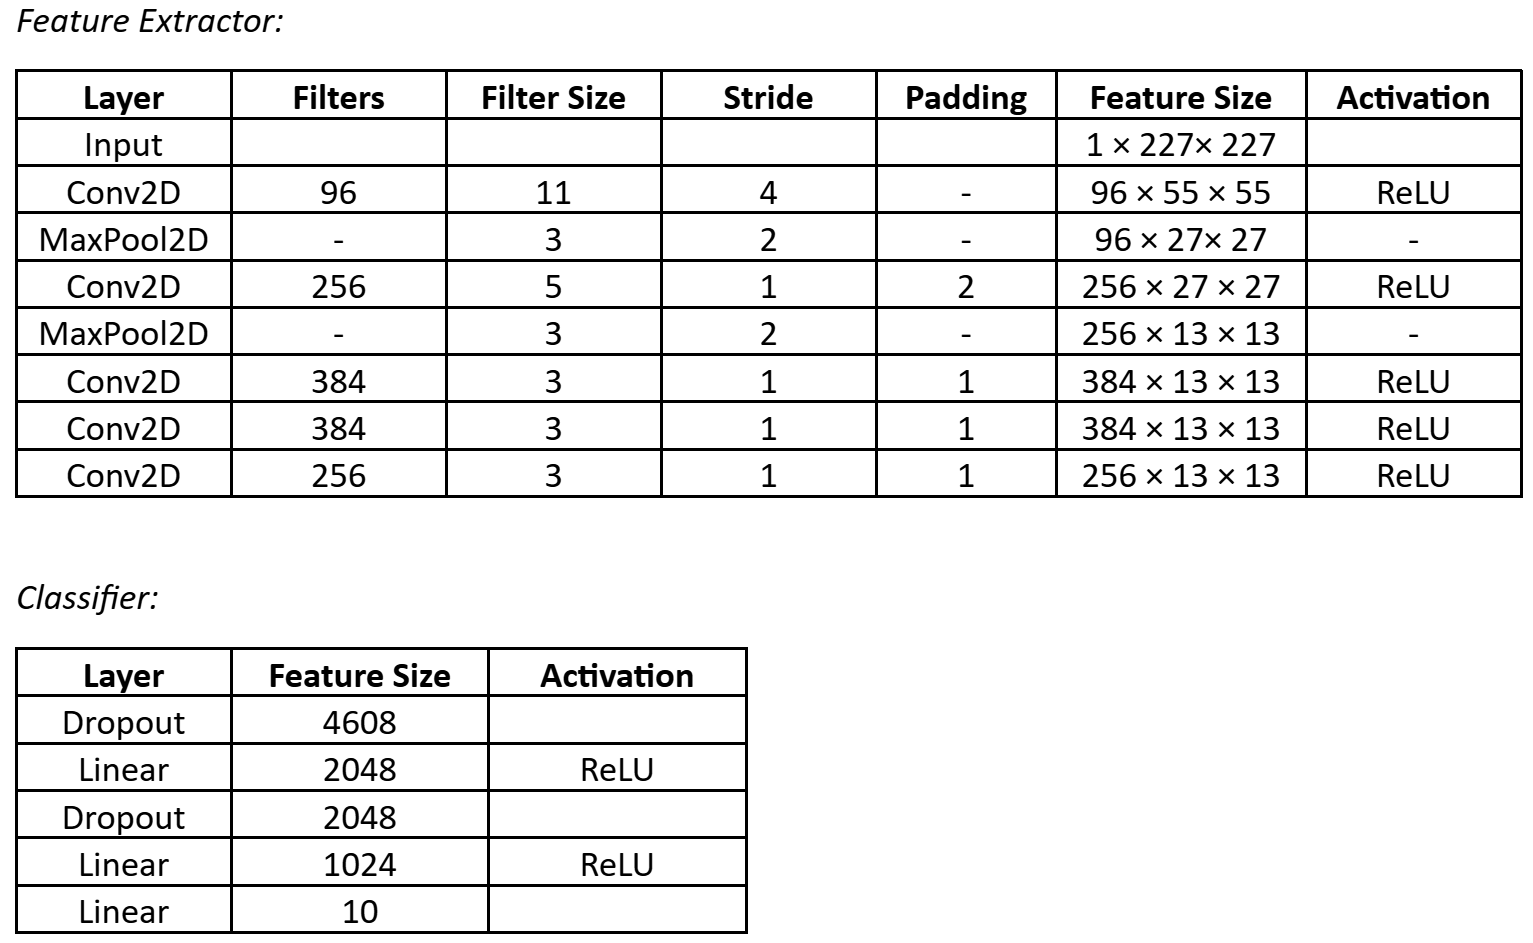

In [20]:
'''
BUILDING A TRIMMED ALEX-NET FOR MNIST CLASSIFICATION
'''

class AlexNet(nn.Module):
    def __init__(self, num=10):
        super(AlexNet, self).__init__()
        self.feature = nn.Sequential(
            nn.Conv2d(1, 256, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d( kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True)
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256*13*13,2048),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(2048,1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024,num)
        )

    def forward(self, x):

        x = self.feature(x)
        x = x.view(-1,256*13*13)
        x = self.classifier(x)
        return x

In [21]:
'''
ANALYZING TORCH MODEL SUMMARY
'''

model = AlexNet()

'''
ACCLERATED COMPUTING
'''

if torch.cuda.is_available():
  print('GPU is available!')
  model.cuda()

summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 256, 28, 28]           6,656
              ReLU-2          [-1, 256, 28, 28]               0
         MaxPool2d-3          [-1, 256, 13, 13]               0
            Conv2d-4          [-1, 384, 13, 13]         885,120
              ReLU-5          [-1, 384, 13, 13]               0
            Conv2d-6          [-1, 384, 13, 13]       1,327,488
              ReLU-7          [-1, 384, 13, 13]               0
            Conv2d-8          [-1, 256, 13, 13]         884,992
              ReLU-9          [-1, 256, 13, 13]               0
          Dropout-10                [-1, 43264]               0
           Linear-11                 [-1, 2048]      88,606,720
             ReLU-12                 [-1, 2048]               0
          Dropout-13                 [-1, 2048]               0
           Linear-14                 [-

In [22]:
'''
MODEL TRAINING AND TESTING FUNCTIONS
'''

train_losses = []
test_losses = []

def train(model,optimizer,train_loader,epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        train_losses.append(loss.item())
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('\rEpoch: {} {:.0f}%\t     Loss: {:.6f}'.format(
                epoch,
                100. * batch_idx / len(train_loader), loss.item()), end='')

def test(model,test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        with torch.no_grad():
            data, target = Variable(data), Variable(target)
        output = model(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item()#size_average=False
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()


    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    acc=100. * float(correct.to(torch.device('cpu')).numpy())
    print('\nTest result: Average loss: {:.4f}, Accuracy: {:.4f}%\n'.format(
        test_loss, acc / len(test_loader.dataset)))

    test_accuracy = (acc / len(test_loader.dataset))
    return test_accuracy

In [23]:
'''
INITIALIZE THE OPTIMIZER - LOSS FUNCTION
'''

optimizer = optim.SGD(model.parameters(), lr=0.01)

In [24]:
'''
TRAIN AND TEST THE MODEL
'''

epochs = 2

for epoch in range(1, epochs+1):
    train(model,optimizer,train_loader,epoch)
    accuracy = test(model,test_loader)
    # print(f'----------------')
    # print(f'Epoch: {epoch+1}')
    # print(f'Accuracy: {accuracy}')

Epoch: 1 99%	     Loss: 0.025204
Test result: Average loss: 0.0969, Accuracy: 96.7300%

Epoch: 2 99%	     Loss: 0.016909
Test result: Average loss: 0.0511, Accuracy: 98.2800%

